# 🏠 Predicting the Sale Price of Houses using Machine Learning

In this notebook, we're going to try and hit top 10% on Kaggle using machine learning with the goal of predicting the sale price of houses.

This is a **regression problem** since we are trying to predict a number.

The data and evaluation metric we'll be using (root-mean-squared-error) is from the Kaggle House Prices competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling

# Table of contents
1. [Problem Definition](#problemdefinition)
2. [Data](#data)
3. [Evaluation](#evaluation)
4. [Features](#features)
5. [Modelling](#modelling)

## 1. Problem definition <a name="problemdefinition"></a>

In a statement,
> Can we predict as accurate as possible the prices of different houses, given certain metrics?

## 2. Data <a name="data"></a>

The data came from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. (*ENTER COMPETITION TO VIEW DATA*)

It was compiled by Dean De Cock for use in data science education.

## 3. Evaluation <a name="evaluation"></a>

> If we can reach an RMSE of less than 4, it would be extraordinary.

## 4. Features <a name="features"></a>

Data dictionary: 

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


## **Questions**:

1. What is model stacking?
2. What is ensembling?
3. What are boosting algorithms?

## **Notes**:

Whenever I do competitions or the sort, I should think about how to solve the problem logically and then be facilitated by machine learning.

Here are some things I am taking from https://www.kaggle.com/saurabhprakashgiri/house-prices-prediction-advanced-regression/data:

**DATA PROCESSING**
* Delete the huge outliners from data.
* Log - transformation of target variable
* Box Cox Transformation of (highly) skewed features

**Modelling** # never heard of some of these models before.
1. LASSO Regression
2. Elastic Net Regression
3. Kernel Ridge Regression
4. Gradient Boosting Regression
5. XGBoost
6. LightBGM



In [1]:
#import sys
#!{sys.executable} -m pip install catboost

In [93]:
# Standard imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats # ?
from scipy.stats import norm, skew # for some statistics # ? maybe not necessary
color = sns.color_palette()
sns.set_style("darkgrid")

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore warning from sklearn and seaborn

# Machine learning libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Open the data
df = pd.read_csv("house-prices-advanced/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.set_index('Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df['YrSold'].head()

Id
1    2008
2    2007
3    2008
4    2006
5    2008
Name: YrSold, dtype: int64

In [7]:
len(df)

1460

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [10]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(pd.isnull(content).sum())
            print(label)

259
LotFrontage
8
MasVnrArea
81
GarageYrBlt


In [14]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [15]:
df['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [16]:
df['GarageYrBlt']

Id
1       2003.0
2       1976.0
3       2001.0
4       1998.0
5       2000.0
         ...  
1456    1999.0
1457    1978.0
1458    1941.0
1459    1950.0
1460    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [17]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column to tell if data was missing
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [18]:
# Checking for missing values again
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(pd.isnull(content).sum())
            print(label)

In [19]:
# Now let's clean our string data
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(pd.isnull(content).sum())
            print(label)

1369
Alley
8
MasVnrType
37
BsmtQual
37
BsmtCond
38
BsmtExposure
37
BsmtFinType1
38
BsmtFinType2
1
Electrical
690
FireplaceQu
81
GarageType
81
GarageFinish
81
GarageQual
81
GarageCond
1453
PoolQC
1179
Fence
1406
MiscFeature


In [20]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [21]:
df['PoolQC']

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: PoolQC, Length: 1460, dtype: object

In [22]:
pd.Categorical(df['Neighborhood']).codes

array([ 5, 24,  5, ...,  6, 12,  7], dtype=int8)

In [23]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column
            df[label+"_is_missing"] = pd.isnull(content)
        # Transform strings into codes
        df[label] = pd.Categorical(content).codes+1

In [24]:
pd.isnull(df).sum()

MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
Street                    0
                         ..
GarageQual_is_missing     0
GarageCond_is_missing     0
PoolQC_is_missing         0
Fence_is_missing          0
MiscFeature_is_missing    0
Length: 99, dtype: int64

In [25]:
# Now let's clean our string data
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(pd.isnull(content).sum())
            print(label)

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True


## Now let's do machine learning on our data

In [27]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [28]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1460 non-null   int64  
 1   MSZoning                 1460 non-null   int8   
 2   LotFrontage              1460 non-null   float64
 3   LotArea                  1460 non-null   int64  
 4   Street                   1460 non-null   int8   
 5   Alley                    1460 non-null   int8   
 6   LotShape                 1460 non-null   int8   
 7   LandContour              1460 non-null   int8   
 8   Utilities                1460 non-null   int8   
 9   LotConfig                1460 non-null   int8   
 10  LandSlope                1460 non-null   int8   
 11  Neighborhood             1460 non-null   int8   
 12  Condition1               1460 non-null   int8   
 13  Condition2               1460 non-null   int8   
 14  BldgType                

In [30]:
# Let's split our data 
X = df.drop("SalePrice", axis=1)
y = df['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model = XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
# Score the model
model.score(X_test, y_test)

0.7921206670651476

In [32]:
df_tmp = df.copy() # making a copy of the original data to avoid complications

In [33]:
df_tmp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,4,62.0,7917,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,True,True
1457,20,4,85.0,13175,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,False,True
1458,70,4,66.0,9042,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,False,False


We have tried XGBRegressor so far, let's try and compare a couple different models:

1. XGBRegressor
2. RandomForestRegressor
3. LinearRegression
4. CatBoostRegressor

In [34]:
# Let's create a function that is using all these models
# But first... import!

In [35]:
def model_testing():
    """We are testing 4 different models and progressing with the best 2."""
    np.random.seed(42)
    
    scores = {}
    
    models = {'XGBoost': XGBRegressor(),
             'RandomForestRegressor': RandomForestRegressor(),
             'LinearRegression': LinearRegression(),
             'CatBoostRegressor': CatBoostRegressor(),}
    
    for k, v in models.items():
        scores[k] = v.fit(X_train, y_train).score(X_test, y_test)
        
    return scores

In [36]:
model_testing()

Learning rate set to 0.040124
0:	learn: 78450.4918280	total: 226ms	remaining: 3m 45s
1:	learn: 76545.5611424	total: 239ms	remaining: 1m 59s
2:	learn: 74609.2003119	total: 251ms	remaining: 1m 23s
3:	learn: 72743.8789919	total: 293ms	remaining: 1m 13s
4:	learn: 70905.3894190	total: 307ms	remaining: 1m 1s
5:	learn: 69287.1114768	total: 326ms	remaining: 54s
6:	learn: 67663.7628564	total: 331ms	remaining: 46.9s
7:	learn: 65946.9052266	total: 337ms	remaining: 41.8s
8:	learn: 64625.0638822	total: 342ms	remaining: 37.6s
9:	learn: 63203.3070458	total: 347ms	remaining: 34.4s
10:	learn: 61897.8332264	total: 360ms	remaining: 32.4s
11:	learn: 60565.1964063	total: 369ms	remaining: 30.4s
12:	learn: 59273.5771672	total: 375ms	remaining: 28.5s
13:	learn: 57985.3789495	total: 381ms	remaining: 26.9s
14:	learn: 56632.5014847	total: 386ms	remaining: 25.4s
15:	learn: 55409.9092742	total: 392ms	remaining: 24.1s
16:	learn: 54288.6648099	total: 399ms	remaining: 23.1s
17:	learn: 53166.1880592	total: 404ms	remai

179:	learn: 18073.0857708	total: 1.23s	remaining: 5.59s
180:	learn: 18039.8053448	total: 1.23s	remaining: 5.57s
181:	learn: 18002.7186629	total: 1.24s	remaining: 5.55s
182:	learn: 17966.0970777	total: 1.24s	remaining: 5.54s
183:	learn: 17886.4200022	total: 1.25s	remaining: 5.52s
184:	learn: 17842.2200095	total: 1.25s	remaining: 5.51s
185:	learn: 17808.6953228	total: 1.26s	remaining: 5.5s
186:	learn: 17780.9947141	total: 1.26s	remaining: 5.48s
187:	learn: 17745.8792841	total: 1.26s	remaining: 5.46s
188:	learn: 17719.9108908	total: 1.27s	remaining: 5.45s
189:	learn: 17683.2672889	total: 1.27s	remaining: 5.43s
190:	learn: 17652.8817154	total: 1.28s	remaining: 5.42s
191:	learn: 17607.0951602	total: 1.28s	remaining: 5.4s
192:	learn: 17571.7981484	total: 1.29s	remaining: 5.38s
193:	learn: 17535.3425614	total: 1.29s	remaining: 5.36s
194:	learn: 17517.4001363	total: 1.29s	remaining: 5.34s
195:	learn: 17459.7283766	total: 1.3s	remaining: 5.32s
196:	learn: 17382.6482723	total: 1.3s	remaining: 5.

359:	learn: 12905.1401688	total: 2.05s	remaining: 3.64s
360:	learn: 12878.7775946	total: 2.05s	remaining: 3.63s
361:	learn: 12863.9130013	total: 2.06s	remaining: 3.62s
362:	learn: 12836.8418775	total: 2.06s	remaining: 3.62s
363:	learn: 12811.8958282	total: 2.07s	remaining: 3.61s
364:	learn: 12787.0587536	total: 2.07s	remaining: 3.61s
365:	learn: 12763.1415908	total: 2.08s	remaining: 3.6s
366:	learn: 12733.8551539	total: 2.08s	remaining: 3.6s
367:	learn: 12721.7340582	total: 2.09s	remaining: 3.59s
368:	learn: 12698.3865284	total: 2.09s	remaining: 3.58s
369:	learn: 12675.9365991	total: 2.1s	remaining: 3.57s
370:	learn: 12651.6623407	total: 2.1s	remaining: 3.57s
371:	learn: 12631.3572088	total: 2.11s	remaining: 3.56s
372:	learn: 12612.3809441	total: 2.11s	remaining: 3.55s
373:	learn: 12592.5382573	total: 2.12s	remaining: 3.55s
374:	learn: 12565.4454872	total: 2.13s	remaining: 3.54s
375:	learn: 12545.7167120	total: 2.13s	remaining: 3.54s
376:	learn: 12518.3901210	total: 2.13s	remaining: 3.

508:	learn: 10283.4348248	total: 2.72s	remaining: 2.62s
509:	learn: 10259.6229745	total: 2.72s	remaining: 2.62s
510:	learn: 10230.9825882	total: 2.73s	remaining: 2.61s
511:	learn: 10215.9825439	total: 2.73s	remaining: 2.6s
512:	learn: 10206.4514451	total: 2.73s	remaining: 2.6s
513:	learn: 10189.7746731	total: 2.74s	remaining: 2.59s
514:	learn: 10169.1124909	total: 2.74s	remaining: 2.58s
515:	learn: 10148.3531786	total: 2.75s	remaining: 2.58s
516:	learn: 10147.1173219	total: 2.75s	remaining: 2.57s
517:	learn: 10125.3515933	total: 2.76s	remaining: 2.56s
518:	learn: 10112.0817149	total: 2.76s	remaining: 2.56s
519:	learn: 10096.3227322	total: 2.76s	remaining: 2.55s
520:	learn: 10074.1727681	total: 2.77s	remaining: 2.54s
521:	learn: 10060.0401477	total: 2.77s	remaining: 2.54s
522:	learn: 10053.2722893	total: 2.78s	remaining: 2.53s
523:	learn: 10031.0396895	total: 2.78s	remaining: 2.53s
524:	learn: 10010.9670206	total: 2.79s	remaining: 2.52s
525:	learn: 10009.0031825	total: 2.79s	remaining: 

680:	learn: 8136.7584733	total: 3.39s	remaining: 1.59s
681:	learn: 8124.6741401	total: 3.39s	remaining: 1.58s
682:	learn: 8117.2923273	total: 3.4s	remaining: 1.58s
683:	learn: 8106.6291008	total: 3.4s	remaining: 1.57s
684:	learn: 8101.3326550	total: 3.4s	remaining: 1.56s
685:	learn: 8086.6285710	total: 3.41s	remaining: 1.56s
686:	learn: 8084.1479445	total: 3.41s	remaining: 1.55s
687:	learn: 8072.9468269	total: 3.42s	remaining: 1.55s
688:	learn: 8062.8195976	total: 3.42s	remaining: 1.54s
689:	learn: 8056.6590500	total: 3.42s	remaining: 1.54s
690:	learn: 8045.8755272	total: 3.43s	remaining: 1.53s
691:	learn: 8039.2208711	total: 3.43s	remaining: 1.53s
692:	learn: 8029.8820494	total: 3.44s	remaining: 1.52s
693:	learn: 8018.0117835	total: 3.44s	remaining: 1.52s
694:	learn: 8014.0904759	total: 3.45s	remaining: 1.51s
695:	learn: 8006.6174567	total: 3.45s	remaining: 1.51s
696:	learn: 7997.1194840	total: 3.46s	remaining: 1.5s
697:	learn: 7996.1583027	total: 3.46s	remaining: 1.5s
698:	learn: 798

861:	learn: 6583.1031848	total: 4.07s	remaining: 651ms
862:	learn: 6576.4926217	total: 4.07s	remaining: 646ms
863:	learn: 6568.6518239	total: 4.08s	remaining: 642ms
864:	learn: 6568.0773438	total: 4.08s	remaining: 637ms
865:	learn: 6567.1032060	total: 4.08s	remaining: 632ms
866:	learn: 6562.0309587	total: 4.09s	remaining: 627ms
867:	learn: 6554.3318217	total: 4.09s	remaining: 622ms
868:	learn: 6548.8307857	total: 4.09s	remaining: 617ms
869:	learn: 6547.0783035	total: 4.1s	remaining: 612ms
870:	learn: 6539.0265126	total: 4.1s	remaining: 607ms
871:	learn: 6530.4529004	total: 4.11s	remaining: 603ms
872:	learn: 6529.9489785	total: 4.11s	remaining: 598ms
873:	learn: 6527.1814545	total: 4.11s	remaining: 593ms
874:	learn: 6521.1142056	total: 4.12s	remaining: 588ms
875:	learn: 6514.5910533	total: 4.12s	remaining: 583ms
876:	learn: 6514.0807048	total: 4.12s	remaining: 579ms
877:	learn: 6505.8625351	total: 4.13s	remaining: 574ms
878:	learn: 6505.3435352	total: 4.13s	remaining: 569ms
879:	learn: 

{'XGBoost': 0.7921206670651476,
 'RandomForestRegressor': 0.814233164241281,
 'LinearRegression': 0.7671986612720146,
 'CatBoostRegressor': 0.8363104303053776}

### Here are the results:
* 'XGBoost': 0.8078668851088204
* 'RandomForestRegressor': 0.8568939326814
* 'LinearRegression': 0.8529775973790532
* 'CatBoostRegressor': 0.8713168551389319

We are going to progress forward with XGBoost and CatBoostRegressor. But why?

I want to progress forward with these two because I never used CatBoostRegressor before and XGBoost is widely used and very good.

### I want to have results with hyperparameter tuning before feature engineering and after.

In [37]:
# Hyperparameter grids
xgbr_grid = {"learning_rate" : [0.05, 0.15, 0.30],
 "max_depth": [3, 6, 15],
 "min_child_weight": [1, 4, 7],
 "gamma": [0.0, 0.2, 0.4],
 "colsample_bytree": [0.3, 0.5, 0.7],}

catboostr_grid = {"iterations": [100, 300, 500],
                 "learning_rate":[0.01, 0.02, 0.03],
                 "depth": [1, 3, 6],
                 "l2_leaf_reg": [1, 2, 3],
                 "border_count": [1, 16, 32],}

In [38]:
# Use RandomizedSearchCV for grids
xgbr_model = RandomizedSearchCV(XGBRegressor(),
                               param_distributions=xgbr_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True)

catboostr_model = RandomizedSearchCV(CatBoostRegressor(),
                                    param_distributions=catboostr_grid,
                                    n_iter=20,
                                    cv=5,
                                    verbose=True)

#xgbr_model.fit(X_train, y_train)
#catboostr_model.fit(X_train, y_train)

In [39]:
#xgbr_model.best_params_

In [40]:
#catboostr_model.best_params_

In [41]:
# Let's compare XGBRegression vs CatBoostRegression model's best parameter.
%time
#print(xgbr_model.score(X_test, y_test))
#print(catboostr_model.score(X_test, y_test))

Wall time: 0 ns


From our results it seems like XGBRegression is the best.

What is next?

* Feature engineering (graphing etc.).
* Grid Search.

### Feature Engineering

In [42]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True


In [43]:
# First off, let's create a copy of our data.
df_copy = df.copy()

In [44]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True


In [45]:
df_copy['MSSubClass']

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: int64

In [46]:
df_copy['SaleType'].value_counts()

9    1267
7     122
1      43
4       9
6       5
5       5
2       4
8       3
3       2
Name: SaleType, dtype: int64

In [47]:
df_copy['Utilities']

Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    1
1460    1
Name: Utilities, Length: 1460, dtype: int8

## Here is a list of all the variables which had missing data.

Numerical: 

* LotFrontage - 259 missing # This could matter..? Linear feet of street connected to property.
* MasVnrArea - 8 missing # Filled in a median square feet area for 8. I would say it is okay. (?)
* GarageYrBlt - 81 missing

String:

* Alley - 1369 missing # This is actually not missing. It means, 'no alley access'.
* MasVnrType - 8 missing # Not missing. It just means there are none of this type.
* BsmtQual - 37 missing # No basements.
* BsmtCond - 37 missing # No basements so no conditions.
* BsmtExposure - 38 missing # No basement.
* BsmtFinType1 - 37 missing # No basement.
* BsmtFinType2 - 38 missing # No basement.
* Electrical - 1 missing # Doesn't make that much of a difference. Maybe data just doesn't exist for this one.
* FireplaceQu - 690 missing # 690 homes have no fireplaces.
* GarageType - 81 missing # 81 homes no garage.
* GarageFinish - 81 missing # 81 homes no garage.
* GarageQual - 81 missing # 81 homes no garage.
* GarageCond - 81 missing # 81 homes no garage.
* PoolQC - 1453 missing # Big misunderstanding. Yet again, not missing data but a lot of homes, 98% of them probably, have no pool.
* Fence - 1179 missing # no fence
* MiscFeature - 1406 missing # no miscellaneous feature

In [48]:
# It all seems to be fine to me. I am confused about what else to try.
# Let's do some graphing now maybe?

(-10, 80)

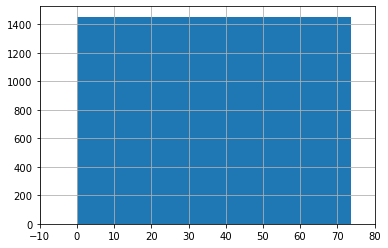

In [49]:
df_copy['PoolArea'].hist()
plt.xlim([-10, 80])

In [50]:
df_copy['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

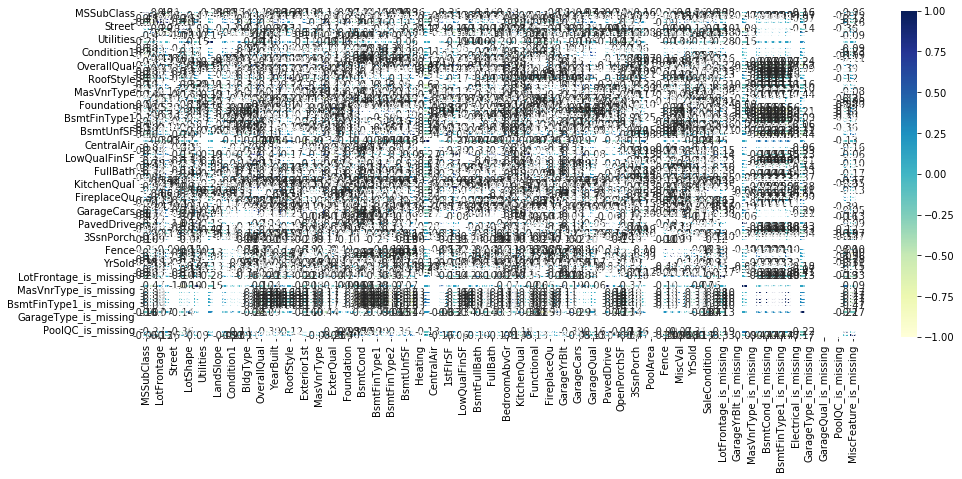

In [51]:
# Build a correlational matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_copy[:25].corr(),
                     linewidths=0.75,
                     fmt='.2f',
                     cmap='YlGnBu',
                     annot=True)

In [52]:
df_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,4,62.0,7917,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,True,True
1457,20,4,85.0,13175,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,False,True
1458,70,4,66.0,9042,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,False,False


In [53]:
# Let's predict on the test data.
test_df = pd.read_csv("house-prices-advanced/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
test_df.set_index('Id', inplace=True)

In [55]:
# Now it works for some reason..
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
#test_df['SalePrice'] it doesn't exist so that's good.

In [57]:
set(df_copy) - set(test_df)

{'Alley_is_missing',
 'BsmtCond_is_missing',
 'BsmtExposure_is_missing',
 'BsmtFinType1_is_missing',
 'BsmtFinType2_is_missing',
 'BsmtQual_is_missing',
 'Electrical_is_missing',
 'Fence_is_missing',
 'FireplaceQu_is_missing',
 'GarageCond_is_missing',
 'GarageFinish_is_missing',
 'GarageQual_is_missing',
 'GarageType_is_missing',
 'GarageYrBlt_is_missing',
 'LotFrontage_is_missing',
 'MasVnrArea_is_missing',
 'MasVnrType_is_missing',
 'MiscFeature_is_missing',
 'PoolQC_is_missing',
 'SalePrice'}

Here we are running into a problem. The train data is processed, but the test data not only is it missing a lot of columns, but it is also not processed.

Let's make a function to take care of that.

In [58]:
def preprocess_data(df):
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [59]:
df_test = preprocess_data(test_df)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1462,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,True,True,False,False,False
1463,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1464,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1465,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,True,True,True,False,False


In [60]:
set(df_test.columns) - set(df_copy.columns)

{'BldgType_is_missing',
 'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'CentralAir_is_missing',
 'Condition1_is_missing',
 'Condition2_is_missing',
 'ExterCond_is_missing',
 'ExterQual_is_missing',
 'Exterior1st_is_missing',
 'Exterior2nd_is_missing',
 'Foundation_is_missing',
 'Functional_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'HeatingQC_is_missing',
 'Heating_is_missing',
 'HouseStyle_is_missing',
 'KitchenQual_is_missing',
 'LandContour_is_missing',
 'LandSlope_is_missing',
 'LotConfig_is_missing',
 'LotShape_is_missing',
 'MSZoning_is_missing',
 'Neighborhood_is_missing',
 'PavedDrive_is_missing',
 'RoofMatl_is_missing',
 'RoofStyle_is_missing',
 'SaleCondition_is_missing',
 'SaleType_is_missing',
 'Street_is_missing',
 'TotalBsmtSF_is_missing',
 'Utilities_is_missing'}

In [61]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1251,20,4,93.0,11160,2,0,4,4,1,1,...,False,False,False,False,False,False,False,True,True,True
266,20,4,78.0,12090,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,False,True
226,160,5,21.0,1680,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
390,60,4,96.0,12474,2,0,4,4,1,5,...,False,False,False,False,False,False,False,True,True,True
29,20,4,47.0,16321,2,0,1,4,1,2,...,False,False,False,False,False,False,False,True,True,True


In [62]:
df_tmp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_is_missing,Electrical_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,True,False,False,False,False,True,True,True
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,True,True,True
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,True,True,True
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,True,True,True
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,True,True,True


In [63]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1462,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,True,True,False,False,False
1463,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1464,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1465,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,True,True,True,False,False


In [64]:
# Something weird is happening. I think the test data was missing more than 
# train data. 

In [65]:
def missing_columns(df):
    total_missing = 0
    for label, content in df.items():
        if "_is_missing" in label:
            print("Column " + label + " had missing data.")
            total_missing += 1
    return f'{total_missing} columns had missing data.'

In [66]:
missing_columns(test_df)

Column MSZoning_is_missing had missing data.
Column LotFrontage_is_missing had missing data.
Column Street_is_missing had missing data.
Column Alley_is_missing had missing data.
Column LotShape_is_missing had missing data.
Column LandContour_is_missing had missing data.
Column Utilities_is_missing had missing data.
Column LotConfig_is_missing had missing data.
Column LandSlope_is_missing had missing data.
Column Neighborhood_is_missing had missing data.
Column Condition1_is_missing had missing data.
Column Condition2_is_missing had missing data.
Column BldgType_is_missing had missing data.
Column HouseStyle_is_missing had missing data.
Column RoofStyle_is_missing had missing data.
Column RoofMatl_is_missing had missing data.
Column Exterior1st_is_missing had missing data.
Column Exterior2nd_is_missing had missing data.
Column MasVnrType_is_missing had missing data.
Column MasVnrArea_is_missing had missing data.
Column ExterQual_is_missing had missing data.
Column ExterCond_is_missing h

'54 columns had missing data.'

In [67]:
missing_columns(df_copy)

Column LotFrontage_is_missing had missing data.
Column MasVnrArea_is_missing had missing data.
Column GarageYrBlt_is_missing had missing data.
Column Alley_is_missing had missing data.
Column MasVnrType_is_missing had missing data.
Column BsmtQual_is_missing had missing data.
Column BsmtCond_is_missing had missing data.
Column BsmtExposure_is_missing had missing data.
Column BsmtFinType1_is_missing had missing data.
Column BsmtFinType2_is_missing had missing data.
Column Electrical_is_missing had missing data.
Column FireplaceQu_is_missing had missing data.
Column GarageType_is_missing had missing data.
Column GarageFinish_is_missing had missing data.
Column GarageQual_is_missing had missing data.
Column GarageCond_is_missing had missing data.
Column PoolQC_is_missing had missing data.
Column Fence_is_missing had missing data.
Column MiscFeature_is_missing had missing data.


'19 columns had missing data.'

#### It is pretty clear now that our test data had way more missing data in the columns.

How do we fix it?

We are going to add the missing columns to our train dataframe and insert False in all the columns since there are no missing values from there.

We are doing this because there needs to be an equal amount of columns in both our train and test data so that we can apply what our model has learned on the train data and fit it onto the test data.

In [68]:
# Make a function which adds missing columns to the train data or vice versa.
def balance_columns(test_data, train_data):
    for i in set(test_data) - set(train_data):
        train_data[i] = False

In [69]:
balance_columns(test_df, df_copy)

In [70]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Exterior1st_is_missing,BsmtHalfBath_is_missing,Condition2_is_missing,BsmtFullBath_is_missing,RoofStyle_is_missing,BsmtFinSF2_is_missing,SaleType_is_missing,Functional_is_missing,MSZoning_is_missing,LandContour_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,False,False,False
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,False,False,False


In [71]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1462,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,True,True,False,False,False
1463,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1464,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1465,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,True,True,True,False,False


In [72]:
# Make predictions on the test dataset using the best model
#test_preds = xgbr_model.predict(test_df)

In [73]:
# I am going to retrain my data.
np.random.seed(42)

X = df_copy.drop("SalePrice", axis=1)
y = df_copy['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgbr_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [74]:
xgbr_model.best_params_

{'min_child_weight': 4,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [75]:
ideal_model = XGBRegressor(min_child_weight=4,
                         max_depth=15,
                         learning_rate=0.05,
                         gamma=0.4,
                         colsample_bytree=0.5)

ideal_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
# Let's try to make the prediction again.
#test_preds = ideal_model.predict(test_df)

Well.. that did not work but I needed to refit the model anyway.

In [77]:
# Let's match the column names from both datasets

In [78]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1462,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,True,True,False,False,False
1463,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1464,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
1465,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,True,True,True,False,False


In [79]:
df_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Exterior1st_is_missing,BsmtHalfBath_is_missing,Condition2_is_missing,BsmtFullBath_is_missing,RoofStyle_is_missing,BsmtFinSF2_is_missing,SaleType_is_missing,Functional_is_missing,MSZoning_is_missing,LandContour_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,False,False,False
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,False,False,False


In [80]:
set(df_copy) - set(test_df)

{'SalePrice'}

In [81]:
cols_when_model_builds = ideal_model.get_booster().feature_names

In [82]:
cols_when_model_builds

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [83]:
test_df = test_df[cols_when_model_builds]

In [84]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Exterior1st_is_missing,BsmtHalfBath_is_missing,Condition2_is_missing,BsmtFullBath_is_missing,RoofStyle_is_missing,BsmtFinSF2_is_missing,SaleType_is_missing,Functional_is_missing,MSZoning_is_missing,LandContour_is_missing
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
1462,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1463,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
1464,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
1465,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,5,21.0,1936,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
2916,160,5,21.0,1894,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
2917,20,4,160.0,20000,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False


In [85]:
# Let's try to make the prediction again. Part 2
test_preds = ideal_model.predict(test_df) # please work..

In [86]:
# Let's create a dataframe where we can store the results.
df_preds = pd.DataFrame()
df_preds['ID'] = test_df.index
df_preds['SalePrice'] = test_preds
df_preds.head()

,ID,SalePrice
0,1461,125522.242188
1,1462,149341.406250
2,1463,180036.250000
3,1464,192593.921875
4,1465,198485.140625


In [87]:
# Export to csv..
df_preds.to_csv('house-prices-advanced/predictions_1.csv',
               index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the `target variable`.

In [88]:
# Find feature importance of our besgt model
ideal_model.feature_importances_

array([3.48756742e-03, 2.68601184e-03, 1.50687678e-03, 2.31996388e-03,
       0.00000000e+00, 1.46494026e-03, 1.27031375e-03, 4.78329509e-03,
       0.00000000e+00, 5.05951873e-04, 3.70245008e-03, 4.09113988e-03,
       1.14760257e-03, 0.00000000e+00, 1.94097601e-03, 5.13140287e-04,
       2.59949774e-01, 2.23658560e-03, 1.28699215e-02, 5.93155436e-03,
       1.98075734e-03, 0.00000000e+00, 1.50069559e-03, 1.04108232e-03,
       1.24686630e-03, 1.93422113e-03, 2.14743391e-02, 6.52988907e-04,
       8.97883670e-04, 2.07214914e-02, 3.38221854e-03, 1.36674347e-03,
       1.11904473e-03, 7.69473007e-03, 4.15211776e-04, 3.51331313e-04,
       7.93246552e-04, 5.51691093e-03, 1.50024390e-03, 3.38957005e-04,
       1.36412913e-02, 4.21641336e-04, 1.04485685e-02, 6.75581489e-03,
       1.04302668e-03, 4.40523438e-02, 3.13760783e-03, 1.87921076e-04,
       1.02165580e-01, 2.84685218e-03, 4.82866308e-03, 1.73003171e-02,
       4.62327003e-02, 5.43235522e-03, 1.93064311e-03, 1.04889525e-02,
      

In [89]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importance": importances})
         .sort_values("feature_importance", ascending=False)
         .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
               y='features',
               data=df[:n],
               orient="h")

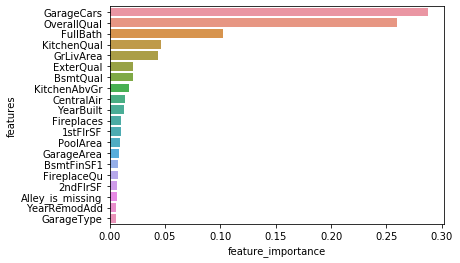

In [90]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [91]:
sum(ideal_model.feature_importances_)

1.000000015104888

In [92]:
# Seems like GarageCars is one of the most important columns.
# GarageCars: Size of garage in car capacity.
# Wondering why that is the most important?
# Second place to it is OverallQual though.